In [5]:
import cv2
import matplotlib.pyplot as plt 
import numpy as np 

In [7]:
image_path = "D:\\Code\\Football\\output_videos\\cropped_image.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

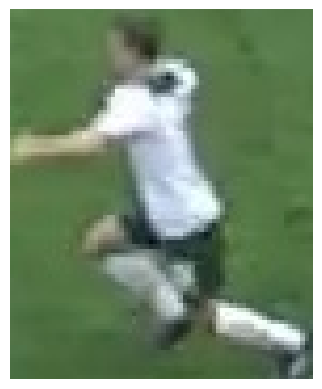

In [10]:
plt.imshow(image)
plt.axis(False)
plt.show()

In [11]:
image.shape

(88, 72, 3)

## **Take the top half of the image**

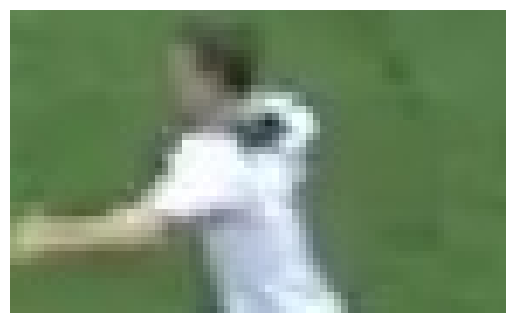

In [13]:

top_half_image = image[0: int(image.shape[0] / 2), :]
plt.imshow(top_half_image)
plt.axis(False)
plt.show()

## **Cluster the image into 2 clusters**

In [14]:
# Reshape the image into 2d array 
image_2d = image.reshape(-1, 3)

In [16]:
image_2d.shape

(6336, 3)

### **Perform K-means clustering with 2 clusters**

In [18]:
from sklearn.cluster import KMeans

In [19]:
kmeans = KMeans(n_clusters=2, random_state=0)

In [20]:
kmeans.fit(image_2d)

KMeans(n_clusters=2, random_state=0)

In [23]:
# Get the clustered labels 
labels = kmeans.labels_

In [30]:
# Reshape the labels into the original image shape 
cluster_image = labels.reshape(image.shape[0], image.shape[1]) 

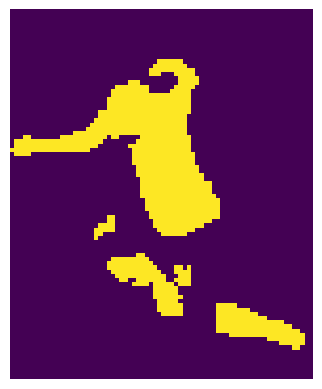

In [32]:
# Display the clustered image
plt.imshow(cluster_image)
plt.axis(False)
plt.show()

In [33]:
half_2d = top_half_image.reshape(-1, 3)
half_2d.shape

(3168, 3)

In [34]:
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(half_2d)

KMeans(n_clusters=2, random_state=0)

In [35]:
labels = kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0], shape=(3168,), dtype=int32)

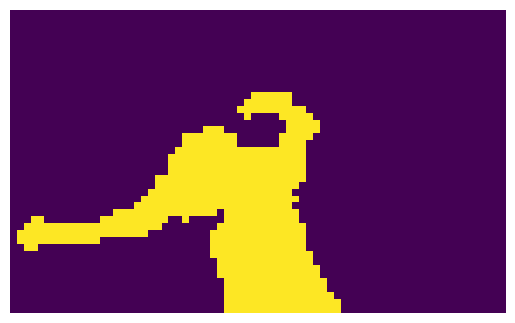

In [43]:
# Reshape the labels into the original image shape 
cluster_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])
plt.imshow(cluster_image)
plt.axis(False)
plt.show()

In [45]:
corner_clusters = [cluster_image[0, 0], cluster_image[0, -1], cluster_image[-1, 0], cluster_image[-1, -1]]

In [46]:
non_player_cluster = max(set(corner_clusters), key = corner_clusters.count)
print(non_player_cluster)

0


In [47]:
player_cluster = 1 - non_player_cluster
print(player_cluster)

1


In [48]:
kmeans.cluster_centers_[player_cluster]

array([198.97468354, 209.32188065, 212.11754069])

##### **RGB color -> [198.97468354, 209.32188065, 212.11754069]**